In [5]:
import pandas as pd
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


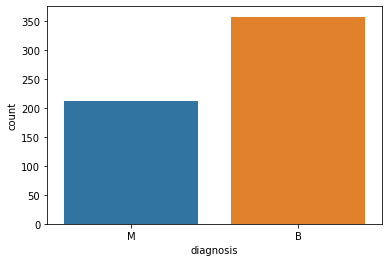

In [6]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [8]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [10]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [11]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu',input_dim=30))
classifier.add(Dropout(.2))

#adding the second hidden layer
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(.2))

#adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [14]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.7099
Epoch 2/150
5/5 [==============================] - 0s 992us/step - loss: 0.6815 - accuracy: 0.8549
Epoch 3/150
5/5 [==============================] - 0s 800us/step - loss: 0.6686 - accuracy: 0.8879
Epoch 4/150
5/5 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.9165
Epoch 5/150
5/5 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.9341
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.9341
Epoch 7/150
5/5 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.9473
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.9473
Epoch 9/150
5/5 [==============================] - 0s 1000us/step - loss: 0.4721 - accuracy: 0.9538
Epoch 10/150
5/5 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.9560
Epoch 11/150
5/5 [====

5/5 [==============================] - 0s 800us/step - loss: 0.0562 - accuracy: 0.9868
Epoch 84/150
5/5 [==============================] - 0s 800us/step - loss: 0.0516 - accuracy: 0.9912
Epoch 85/150
5/5 [==============================] - 0s 600us/step - loss: 0.0499 - accuracy: 0.9890
Epoch 86/150
5/5 [==============================] - 0s 1000us/step - loss: 0.0411 - accuracy: 0.9890
Epoch 87/150
5/5 [==============================] - 0s 1000us/step - loss: 0.0449 - accuracy: 0.9846
Epoch 88/150
5/5 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9890
Epoch 89/150
5/5 [==============================] - 0s 800us/step - loss: 0.0490 - accuracy: 0.9912
Epoch 90/150
5/5 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9912
Epoch 91/150
5/5 [==============================] - 0s 800us/step - loss: 0.0466 - accuracy: 0.9890
Epoch 92/150
5/5 [==============================] - 0s 800us/step - loss: 0.0502 - accuracy: 0.9890
Epoch 93/150
5/

In [16]:
X_test


array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

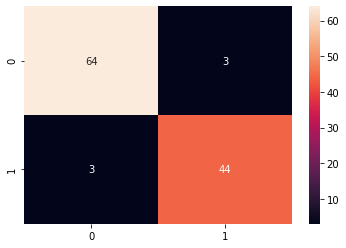

In [19]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [0]:
#First Accuracy after training
(65+44)/114

0.956140350877193

In [0]:
(64+44)/114

0.9473684210526315

Better Optamization Techniques 

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)



In [0]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 1.        , 1.        , 0.97777778, 0.95555556])

In [0]:
accuracies.mean()

0.9823671519756317

In [0]:
accuracies.std()

0.01923075259494915

In [0]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
409/409 [==============================] - 0s 787us/step - loss: 0.6778 - acc: 0.6479
Epoch 2/100
409/409 [==============================] - 0s 124us/step - loss: 0.5151 - acc: 0.8998
Epoch 3/100
409/409 [==============================] - 0s 154us/step - loss: 0.2882 - acc: 0.9511
Epoch 4/100
409/409 [==============================] - 0s 150us/step - loss: 0.1775 - acc: 0.9658
Epoch 5/100
409/409 [==============================] - 0s 153us/step - loss: 0.1217 - acc: 0.9731
Epoch 6/100
409/409 [==============================] - 0s 155us/step - loss: 0.0976 - acc: 0.9756
Epoch 7/100
409/409 [==============================] - 0s 145us/step - loss: 0.0852 - acc: 0.9829
Epoch 8/100
409/409 [==============================] - 0s 127us/step - loss: 0.0772 - acc: 0.9853
Epoch 9/100
409/409 [==============================] - 0s 126us/step - loss: 0.0727 - acc: 0.9853
Epoch 10/100
409/409 [==============================] - 0s 150us/step - loss: 0.0688 - acc: 0.9878
Epoch 11/100
409/40

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


AttributeError: ignored